* Description: the program consists of image processing, more specifically, in manipulating the pixels

* Programmer: Eng. Juan Jose Gañan

* Date: 13/05/2025

* Version: 1.0

## **Sección 1**


### **Librerias**

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Image as IPImage

### **Ejercicio 1**

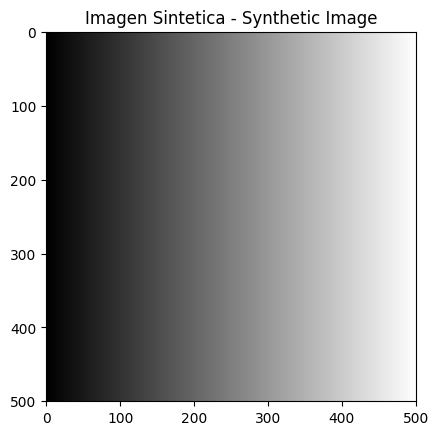

True

In [2]:
# Creamos la matriz
# Pasamos el tipo de dato, hay dos formas "dtype=np.uint8" o "dtype=int".
image = np.zeros((500, 500, 3), dtype=np.uint8) #uint8 se ajusta mejor por el rango de 0 a 255 (Positivos) RGB

# Creamos ciclos para recorrer los pixeles en los ejes X y Y
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        r = int((x / image.shape[1]) * 255)
        g = int((x / image.shape[1]) * 255)
        b = int((x / image.shape[1]) * 255)
        # ((x / image.shape[1]) * 255) Nos sirve para calcular la posicion horizontal del pixel
        # Es decir, (posicion / tamaño de la imagen horizontal X) * el valor al rango de colores (RGB 0-255)
        # Y por ultimo pasamos el valor correspondiente a cada pixel
        image[y, x] = [r, g, b]
# Mostramos imagen
plt.imshow(image)
plt.xticks(np.arange(0, 501, 100), labels=np.arange(0, 501, 100))
plt.yticks(np.arange(0, 501, 100), labels=np.arange(0, 501, 100))
plt.title("Imagen Sintetica - Synthetic Image")
plt.show()
# Guardamos en el Drive
cv2.imwrite('Imagen_Sintetica.png', image)

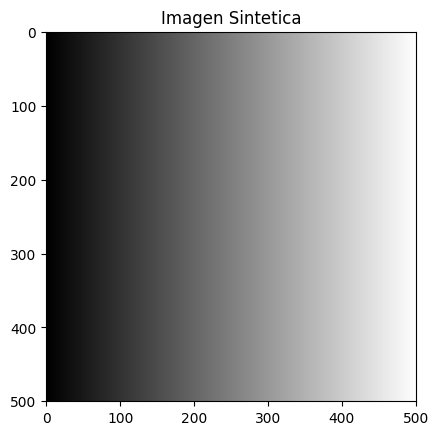

True

In [3]:
# Creamos la matriz
image = np.zeros((500, 500, 3), dtype=np.uint8)

# Calculamos los valores de r, g y b de manera vectorizada
x_values = np.arange(image.shape[1])
r = (x_values / image.shape[1] * 255).astype(np.uint8)
g = (x_values / image.shape[1] * 255).astype(np.uint8)
b = (x_values / image.shape[1] * 255).astype(np.uint8)

# Asignamos los valores a la imagen
image[:, :, 0] = r
image[:, :, 1] = g
image[:, :, 2] = b

# Mostramos la imagen
plt.imshow(image)
plt.xticks(np.arange(0, 501, 100), labels=np.arange(0, 501, 100))
plt.yticks(np.arange(0, 501, 100), labels=np.arange(0, 501, 100))
plt.title("Imagen Sintetica")
plt.show()

# Guardamos en el Drive
cv2.imwrite('Imagen_Sintetica.png', image)

### **Ejercicio 2**

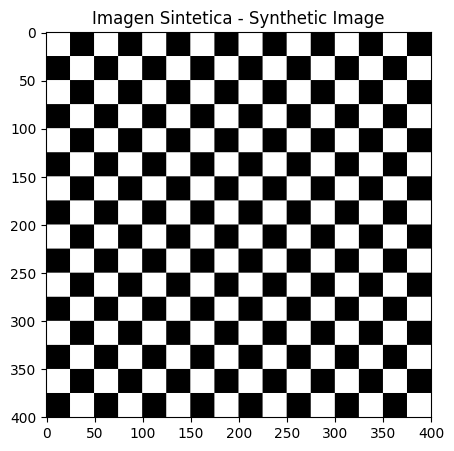

True

In [4]:
# Creamos la matriz
image = np.zeros((400, 400, 3), dtype=np.uint8)

# Asignamos los colores mediante RGB
c_Blanco = [255, 255, 255]
c_Negro = [0, 0, 0]

# Recorremos X y Y (filas, colimnas) para llenar la imagen
for y in range(0, 400, 25):  # El tamaño de la celda es de 25 px
    for x in range(0, 400, 25):
          #Si ambos residuos son iguales pinta de blanco
        if (x // 25) % 2 == (y // 25) % 2:
            color = c_Blanco
          # Sino pinta de negro
        else:
            color = c_Negro
        image[y:y+25, x:x+25] = color # selecciona y actualiza el color en el pixel

# Mostramos imagen sintetica
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.xticks(np.arange(0, 401, 50), labels=np.arange(0, 401, 50))
plt.yticks(np.arange(0, 401, 50), labels=np.arange(0, 401, 50))
plt.title("Imagen Sintetica - Synthetic Image")
plt.show()
# Guardar la imagen en drive usando opencv
cv2.imwrite('tablero.png', image)

# **Sección 2**

### **Ejercicio 3**

True

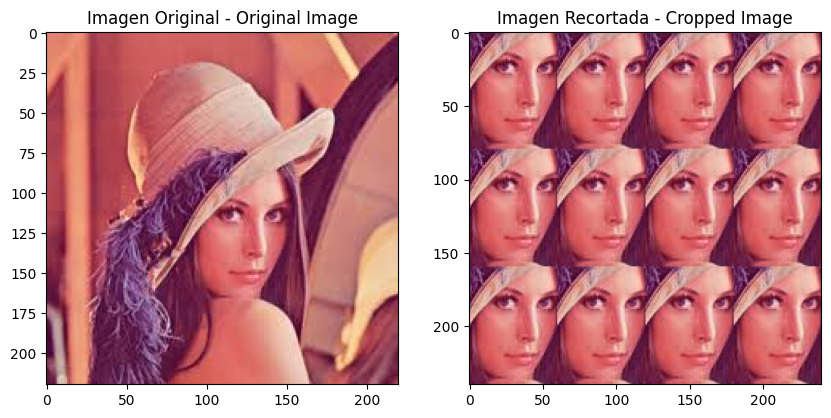

In [5]:

# Cargamos imagen orignal de lena
lena = cv2.imread('lena.jpg', cv2.IMREAD_COLOR)

# Seleccionamos las pixeles del rostro de Lena
pixels = lena[90:170, 90:150, :]

# Crear una matriz en blanco, para repetir 3 (Vertical) y 4 (Horizontal) veces el rostro
cara_lena = np.full((pixels.shape[0] * 3, pixels.shape[1] * 4, 3), 255, dtype=np.uint8)

# Practicamente copiamos y pegamos el rostro de lena, y por ultimo le pasamos todos los canales RGB
for y in range(3):
    for x in range(4):
        cara_lena[y*pixels.shape[0]:(y+1)*pixels.shape[0],
                     x*pixels.shape[1]:(x+1)*pixels.shape[1],:] = pixels

# Convertimos de BGR a RGB para mostrar
result_image_rgb = cv2.cvtColor(cara_lena, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
axs[0].set_title("Imagen Original - Original Image")

axs[1].imshow(result_image_rgb)
axs[1].set_title("Imagen Recortada - Cropped Image")

cv2.imwrite('Face_Lena.jpg', result_image_rgb)

### **Ejercicio 4**

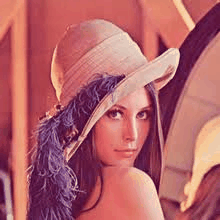

In [10]:
# Cargamos ambas imagenes
imagen_lena = cv2.imread('lena.jpg', cv2.IMREAD_COLOR)
imagen_tigre = cv2.imread('bengal_tiger.jpg', cv2.IMREAD_COLOR)

# Reajustamos tamaño a ambas imagenes para crear el gif
imagen_tigre = cv2.resize(imagen_tigre, (imagen_lena.shape[1], imagen_lena.shape[0]))
# Tiempo de transicion
fotograma = 15
# Creaamos el gif
fotogramass = []
for i in range(fotograma + 1):
    n_imagen = i / fotograma  # mezclamos la imagenes (imagen 0 a imagen 1)

    # Realizamos la mezcla de imagenes
    imagen_resultado = np.zeros_like(imagen_lena, dtype=np.uint8)
    for c in range(3):  # canales de color (RGB)
        imagen_resultado[:, :, c] = (imagen_lena[:, :, c] * (1 - n_imagen) + imagen_tigre[:, :, c] * n_imagen).astype(np.uint8)

    imagen_resultado_rgb = cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB)
    fotogramass.append(Image.fromarray(imagen_resultado_rgb))

# Guardamos el GIF
gif_path = 'Imagen_transicion.gif'
fotogramass[0].save(gif_path, save_all=True, append_images=fotogramass[1:], duration=100, loop=0)

# Mostramos el GIF en el notebook
display(IPImage(filename=gif_path))